<image src="img/Tesoro de denarios romanos de Torre de Juan Abad (Jaén).jpg" width="800" height="600">

Tesoro de denarios romanos de Torre de Juan Abad (Jaén)- MAN

# **CLASIFICADOR DE MONEDAS ANTIGUAS.**

## ÍNDICE
1. [ORIGEN DE LOS DATOS](##1-origen-de-los-datos) 
2. [OBJETIVO DEL PROYECTO](##2-objetivo-del-proyecto)
3. [OBTENCIÓN DE LOS DATOS](##-obtencion-de-los-datos)   

## 1. FUENTE DE LOS DATOS.

Los primeros cinco dataset fueron obtenidos del conjunto de datos 'Coin Images from the Portable Antiquities Scheme' disponible en Kaggle, subido por [Sarah Good](https://www.kaggle.com/segood), los cuales, son unificados en uno. Al ver las características del dataset, decido obtener más características de las monedas, por lo que procedo a realizar webscrapping en la página web del [The British Museum](https://finds.org.uk/database) con la finalidad de obtener la materia prima y el método de fabricación de las monedas.

## 2. OBJETIVO DEL PROYECTO.

El objetivo de este proyecto de Machine Learning consiste en clasificar monedas según su época histórica. Tendremos en total 5 periodos históricos: 

   - Edad del Hierro (s.IX a.C. - s.I d.C.).   
   - Época romana (s.I - s.V d.C.).   
   - Época bajomedieval (s.V - s.XI d.C.).
   - Época medieval (s. XI - XVI d.C.)
   - Época postmedieval (s. XVI - s.XVII d.C.).

## 3. IMPORTAR LOS DATASET.

### 3.1. Datasets procedentes de Kaggle.

In [ ]:
'''IMPORTAR LIBRERÍAS.'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [5]:
# Importar el primer dataset procedente de Kaggle.

data_1 = pd.read_csv('../data/raw/coinlist.csv', encoding='ISO-8859-1')
data_1

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
0,994993,https://finds.org.uk/database/artefacts/record...,BH-638D06,PAS5E5638D00015F4,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1095123,images/mfittock/,BH638D06.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-26T09:22:24Z,2020-03-21T12:50:01Z
1,994706,https://finds.org.uk/database/artefacts/record...,BH-4EEEC1,PAS5E54EEEC001164,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1095036,images/mfittock/,BH4EEEC1.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-25T09:54:52Z,2020-03-21T12:54:45Z
2,994180,https://finds.org.uk/database/artefacts/record...,PUBLIC-E97499,PAS5E4E974900190B,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1093529,images/strebor/,PUBLICE97499RomannummusConstantineIIAD31740BEA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-02-20T14:27:21Z,2020-02-21T11:58:42Z
3,987795,https://finds.org.uk/database/artefacts/record...,PUBLIC-C94E4B,PAS5E1C94E4001BA1,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1087745,images/strebor/,PUBLICC94E4BRomanradiateGallienvsAPOLLINICONSA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-01-13T16:03:48Z,2020-01-13T16:31:01Z
4,983783,https://finds.org.uk/database/artefacts/record...,BH-7A498C,PAS5DE7A498001C96,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1084465,images/sashamarie/,BH7A98C.jpg,Restricted info,Metal detector,Alexandra Cobby,BH,2019-12-04T12:20:40Z,2019-12-13T14:10:31Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,55327,https://finds.org.uk/database/artefacts/record...,BH-C92BE7,0013FBC942101933,COIN,Certain,Penny,NaN,12.3,NaN,...,Verulamium museum,13778,images/jwatters/,hammered 3 obv.jpg,Restricted info,Metal detector,Julian Watters,BH,2003-11-20T10:14:57Z,2011-02-24T13:50:54Z
1895,55216,https://finds.org.uk/database/artefacts/record...,BH-A53441,0013FBA53F10107D,COIN,Certain,Penny,NaN,NaN,NaN,...,Verulamium museum,13722,images/jwatters/,hammered coin ob.jpg,Restricted info,Metal detector,Julian Watters,BH,2003-11-18T17:16:33Z,2011-02-24T13:50:54Z
1896,55212,https://finds.org.uk/database/artefacts/record...,BH-A4BE54,0013FBA4D4201419,COIN,Certain,Penny,Long Cross,NaN,NaN,...,Verulamium museum,13714,images/jwatters/,hammered 2 ob.jpg,Restricted info,Metal detector,Julian Watters,BH,2003-11-18T16:48:02Z,2011-02-24T13:50:54Z
1897,54770,https://finds.org.uk/database/artefacts/record...,BH-21B393,0013FB21D6C01DC0,COIN,Certain,Penny,Short Cross,NaN,NaN,...,with finder,13181,images/jwatters/,henryII0358.jpg,Restricted info,Metal detector,Julian Watters,BH,2003-11-12T11:45:48Z,2011-02-24T13:50:54Z


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1899 non-null   int64  
 1   uri                   1899 non-null   object 
 2   old_findID            1899 non-null   object 
 3   secuid                1899 non-null   object 
 4   objecttype            1899 non-null   object 
 5   objectCertainty       1775 non-null   object 
 6   classification        267 non-null    object 
 7   subClassification     40 non-null     object 
 8   length                14 non-null     float64
 9   height                0 non-null      float64
 10  width                 18 non-null     float64
 11  thickness             663 non-null    float64
 12  diameter              1315 non-null   float64
 13  weight                1639 non-null   float64
 14  quantity              1899 non-null   int64  
 15  otherRef             

In [7]:
# Importar el segundo dataset procedente de Kaggle.

data_2 = pd.read_csv('../data/raw/early_medieval.csv')
data_2

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
0,1004673,https://finds.org.uk/database/artefacts/record...,SUR-8FB1AA,PAS5ED8FB1A001AF6,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1106150,images/smaslin/,SUR8FB1AA.jpg,Restricted info,Metal detector,Simon Maslin,SUR,2020-06-04T14:46:02Z,2020-06-04T16:03:40Z
1,1004671,https://finds.org.uk/database/artefacts/record...,SUR-8F6CBC,PAS5ED8F6CB001D13,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1106149,images/smaslin/,SUR8F6CBC.jpg,Restricted info,Metal detector,Simon Maslin,SUR,2020-06-04T14:27:39Z,2020-06-04T16:02:44Z
2,1004635,https://finds.org.uk/database/artefacts/record...,DUR-7C5F48,PAS5ED7C5F4001809,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1106226,images/benwestwood/,DUR7C5F48.jpg,Restricted info,Metal detector,benjamin westwood,DUR,2020-06-03T16:47:00Z,2020-06-08T13:00:57Z
3,1003706,https://finds.org.uk/database/artefacts/record...,KENT-4FF534,PAS5EC4FF5300144E,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1104679,images/ucljo/,KENT4FF534.jpg,Restricted info,Metal detector,Walter (Jo) Ahmet,KENT,2020-05-20T10:58:43Z,2020-06-18T16:48:02Z
4,1001940,https://finds.org.uk/database/artefacts/record...,IOW-69F13D,PAS5EA69F13001D7E,COIN,NaN,NaN,NaN,NaN,NaN,...,Finder,1101587,images/fbasford/,IOW2020319a.jpg,Restricted info,Metal detector,Frank Basford,IOW,2020-04-27T10:00:03Z,2020-04-27T16:35:13Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,5156,https://finds.org.uk/database/artefacts/record...,KENT719,0013EA1612101442,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,613,images/rhobbs/,kent719a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-10-09T00:00:00Z,2011-02-24T12:21:54Z
1241,5117,https://finds.org.uk/database/artefacts/record...,KENT684,0013EA161210141B,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,590,images/rhobbs/,kent684a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-30T00:00:00Z,2014-01-20T10:00:18Z
1242,5110,https://finds.org.uk/database/artefacts/record...,KENT677,0013EA1612101414,COIN,Certain,Sceatta,NaN,NaN,NaN,...,NaN,576,images/rhobbs/,kent677a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-29T00:00:00Z,2011-02-24T12:21:54Z
1243,5111,https://finds.org.uk/database/artefacts/record...,KENT678,0013EA1612101415,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,578,images/rhobbs/,kent678a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-29T00:00:00Z,2011-02-24T12:21:54Z


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1245 non-null   int64  
 1   uri                   1245 non-null   object 
 2   old_findID            1245 non-null   object 
 3   secuid                1245 non-null   object 
 4   objecttype            1245 non-null   object 
 5   objectCertainty       1032 non-null   object 
 6   classification        114 non-null    object 
 7   subClassification     11 non-null     object 
 8   length                61 non-null     float64
 9   height                0 non-null      float64
 10  width                 59 non-null     float64
 11  thickness             453 non-null    float64
 12  diameter              1058 non-null   float64
 13  weight                1130 non-null   float64
 14  quantity              1245 non-null   int64  
 15  otherRef             

In [9]:
# Importar el tercer dataset procedente de Kaggle.

data_3 = pd.read_csv('../data/raw/greek_provincal.csv')
data_3

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
0,996295,https://finds.org.uk/database/artefacts/record...,LVPL-0C6F54,PAS5E60C6F5001496,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1095537,images/heatherbeeton/,HadrianCopy.jpg,Restricted info,Gardening,Heather Beeton,LVPL,2020-03-05T09:31:33Z,2020-03-09T11:33:35Z
1,965319,https://finds.org.uk/database/artefacts/record...,IOW-443238,PAS5D444323001890,COIN,NaN,NaN,NaN,21.0,NaN,...,Finder,1067642,images/fbasford/,IOW20197269.jpg,Restricted info,Metal detector,Frank Basford,IOW,2019-08-02T15:05:23Z,2019-08-06T13:00:18Z
2,945209,https://finds.org.uk/database/artefacts/record...,SUR-1FB22D,PAS5C91FB22001DC3,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1050209,images/smaslin/,SUR1FB22D.jpg,Restricted info,Metal detector,Simon Maslin,SUR,2019-03-20T08:34:42Z,2019-08-28T12:31:34Z
3,937861,https://finds.org.uk/database/artefacts/record...,LANCUM-49682A,PAS5C549682001A68,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1044343,images/lydiaprosser/,LANCUM49682A.jpg,Restricted info,Metal detector,Lydia Prosser,LANCUM,2019-02-01T18:57:06Z,2019-02-07T10:38:56Z
4,925830,https://finds.org.uk/database/artefacts/record...,SWYOR-970D68,PAS5BE970D600181B,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1034010,images/acooper/,PAS3206IC.jpg,Restricted info,Metal detector,Amy Downes,SWYOR,2018-11-12T12:23:50Z,2018-11-19T15:01:59Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,35012,https://finds.org.uk/database/artefacts/record...,SF8970,0013EA16128019B6,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,7162,images/fminter/,COGGESHALLsf1211sf8970.jpg,Restricted info,Metal detector,Helen Geake,SF,2002-07-23T00:00:00Z,2019-06-04T11:29:55Z
99,45182,https://finds.org.uk/database/artefacts/record...,WMID4942,0013EA1612B011A2,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,15615,images/abolton/,Wmid4942obv.jpg,Restricted info,Metal detector,Angie Bolton,WMID,2002-07-02T00:00:00Z,2012-02-02T10:18:35Z
100,21537,https://finds.org.uk/database/artefacts/record...,SF6727,0013EA1612501473,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,3961,images/jplouviez/,sf6727.jpg,Restricted info,Metal detector,Jude Plouviez,SF,2001-09-12T00:00:00Z,2012-08-15T11:57:38Z
101,6263,https://finds.org.uk/database/artefacts/record...,LVPL1714,0013EA161210189F,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,848,images/nherepath/,lvpl1714.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,2001-02-15T00:00:00Z,2012-08-15T14:04:25Z


In [10]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    103 non-null    int64  
 1   uri                   103 non-null    object 
 2   old_findID            103 non-null    object 
 3   secuid                103 non-null    object 
 4   objecttype            103 non-null    object 
 5   objectCertainty       64 non-null     object 
 6   classification        3 non-null      object 
 7   subClassification     0 non-null      float64
 8   length                6 non-null      float64
 9   height                0 non-null      float64
 10  width                 6 non-null      float64
 11  thickness             53 non-null     float64
 12  diameter              96 non-null     float64
 13  weight                95 non-null     float64
 14  quantity              103 non-null    int64  
 15  otherRef              3

In [11]:
# Importar el cuarto dataset procedente de Kaggle.

data_4 = pd.read_csv('../data/raw/medieval.csv')
data_4

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
0,1006021,https://finds.org.uk/database/artefacts/record...,WMID-1C4525,PAS5EF1C45200159E,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1107868,images/tgilmore/,WMID1C4525.jpg,Restricted info,Metal detector,Teresa Gilmore,WMID,2020-06-23T09:58:58Z,2020-06-23T14:30:09Z
1,1004373,https://finds.org.uk/database/artefacts/record...,SUR-50E7B3,PAS5ED50E7B001380,COIN,NaN,NaN,NaN,16.75,NaN,...,NaN,1105810,images/smaslin/,SUR50E7B3.jpg,Restricted info,Metal detector,Simon Maslin,SUR,2020-06-01T15:19:39Z,2020-06-01T17:10:20Z
2,1003151,https://finds.org.uk/database/artefacts/record...,YORYM-AB6BF2,PAS5EBAB6BF001293,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1103509,images/bmorris/,PS0876.jpg,Restricted info,Metal detector,Rebecca Griffiths,YORYM,2020-05-12T15:46:23Z,2020-06-04T14:34:12Z
3,1002949,https://finds.org.uk/database/artefacts/record...,LEIC-93DEDC,PAS5EB93DED001C40,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1103316,images/meggard1/,93DEDC.jpg,Restricted info,Metal detector,Megan Gard,LEIC,2020-05-11T12:58:37Z,2020-06-04T14:34:58Z
4,1002399,https://finds.org.uk/database/artefacts/record...,WMID-BF3C2F,PAS5EABF3C2001F70,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1105770,images/vallnatt/,WMIDBF3C2F.jpg,Restricted info,Metal detector,Vic Allnatt,WMID,2020-05-01T11:02:42Z,2020-06-04T14:40:58Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,5166,https://finds.org.uk/database/artefacts/record...,KENT728,0013EA161210144C,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,626,images/rhobbs/,kent728a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-10-09T00:00:00Z,2011-02-24T12:21:54Z
4021,6592,https://finds.org.uk/database/artefacts/record...,LVPL309,0013EA16121019E9,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,921,images/nherepath/,lvpl309.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-09-28T00:00:00Z,2011-02-24T13:14:58Z
4022,5190,https://finds.org.uk/database/artefacts/record...,KENT75,0013EA1612101464,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,633,images/rhobbs/,kent75a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-05-27T00:00:00Z,2011-02-24T12:21:54Z
4023,5201,https://finds.org.uk/database/artefacts/record...,KENT76,0013EA161210146F,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,635,images/rhobbs/,kent76a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-05-27T00:00:00Z,2011-02-24T12:21:54Z


In [12]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025 entries, 0 to 4024
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4025 non-null   int64  
 1   uri                   4025 non-null   object 
 2   old_findID            4025 non-null   object 
 3   secuid                4025 non-null   object 
 4   objecttype            4025 non-null   object 
 5   objectCertainty       3464 non-null   object 
 6   classification        222 non-null    object 
 7   subClassification     90 non-null     object 
 8   length                253 non-null    float64
 9   height                4 non-null      float64
 10  width                 250 non-null    float64
 11  thickness             1447 non-null   float64
 12  diameter              3448 non-null   float64
 13  weight                3689 non-null   float64
 14  quantity              4025 non-null   int64  
 15  otherRef             

In [13]:
# Importar el quinto dataset procedente de Kaggle.

data_5 = pd.read_csv('../data/raw/post_medieval.csv')
data_5

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
0,1006309,https://finds.org.uk/database/artefacts/record...,HAMP-5AC459,PAS5EF5AC450019E8,COIN,NaN,NaN,NaN,NaN,NaN,...,Hampshire Cultural Trust (Winchester Collections),1108227,images/smaslinhct/,HAMP5AC459.jpg,Restricted info,Metal detector,Simon Maslin,HAMP,2020-06-26T09:05:25Z,2020-06-26T16:24:14Z
1,1004159,https://finds.org.uk/database/artefacts/record...,LANCUM-FB98D6,PAS5ECFB98D00165B,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1105752,images/AlexIdris/,LANCUMFB98D6.jpg,Restricted info,Metal detector,Alex Whitlock,LANCUM,2020-05-28T14:15:57Z,2020-06-29T16:38:08Z
2,1002380,https://finds.org.uk/database/artefacts/record...,BUC-BE0629,PAS5EABE0620019E5,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1102267,images/sashacobby/,ABCYM5163pas.jpg,Restricted info,Metal detector,Sasha Cobby,BUC,2020-05-01T09:40:02Z,2020-05-01T15:39:23Z
3,998788,https://finds.org.uk/database/artefacts/record...,PUBLIC-4ECF9A,PAS5E74ECF9001A48,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1097147,images/marctelford/,IMG_20200319_112304.jpg,Restricted info,Metal detector,Marc Porter,PUBLIC,2020-03-20T16:19:05Z,2020-03-23T10:42:50Z
4,991118,https://finds.org.uk/database/artefacts/record...,DYFED-4367DE,PAS5E34367D001F12,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1090300,images/jsmith/,NapoleonCoin.jpg,Restricted info,Metal detector,Jenna Smith,DYFED,2020-01-31T14:15:25Z,2020-01-31T14:47:44Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,9095,https://finds.org.uk/database/artefacts/record...,NLM1288,0013EA16122013B2,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,1515,images/melwes/,nlm1288.jpg,Restricted info,Metal detector,Marina Elwes,NLM,1999-02-25T00:00:00Z,2011-02-24T13:15:37Z
2087,6719,https://finds.org.uk/database/artefacts/record...,LVPL427,0013EA1612101A68,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,941,images/nherepath/,lvpl427.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-11T00:00:00Z,2011-02-24T13:14:58Z
2088,6701,https://finds.org.uk/database/artefacts/record...,LVPL410,0013EA1612101A56,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,938,images/nherepath/,lvpl410.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-05T00:00:00Z,2011-02-24T13:14:58Z
2089,4864,https://finds.org.uk/database/artefacts/record...,KENT453,0013EA161210131E,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,532,images/rhobbs/,kent453a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-03T00:00:00Z,2015-01-13T15:27:57Z


In [14]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2091 non-null   int64  
 1   uri                   2091 non-null   object 
 2   old_findID            2091 non-null   object 
 3   secuid                2091 non-null   object 
 4   objecttype            2091 non-null   object 
 5   objectCertainty       1799 non-null   object 
 6   classification        102 non-null    object 
 7   subClassification     14 non-null     object 
 8   length                48 non-null     float64
 9   height                1 non-null      float64
 10  width                 43 non-null     float64
 11  thickness             838 non-null    float64
 12  diameter              1966 non-null   float64
 13  weight                1901 non-null   float64
 14  quantity              2091 non-null   int64  
 15  otherRef             

In [ ]:
'''Unificar todos los dataset provenientes de Kaggle'''

datas_total = [data_1, data_2, data_3, data_4, data_5]

df = pd.concat(datas_total, axis = 0)
df = df.reset_index(drop=True)

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
0,994993,https://finds.org.uk/database/artefacts/record...,BH-638D06,PAS5E5638D00015F4,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1095123,images/mfittock/,BH638D06.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-26T09:22:24Z,2020-03-21T12:50:01Z
1,994706,https://finds.org.uk/database/artefacts/record...,BH-4EEEC1,PAS5E54EEEC001164,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1095036,images/mfittock/,BH4EEEC1.jpg,Restricted info,Metal detector,Matthew Fittock,BH,2020-02-25T09:54:52Z,2020-03-21T12:54:45Z
2,994180,https://finds.org.uk/database/artefacts/record...,PUBLIC-E97499,PAS5E4E974900190B,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1093529,images/strebor/,PUBLICE97499RomannummusConstantineIIAD31740BEA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-02-20T14:27:21Z,2020-02-21T11:58:42Z
3,987795,https://finds.org.uk/database/artefacts/record...,PUBLIC-C94E4B,PAS5E1C94E4001BA1,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1087745,images/strebor/,PUBLICC94E4BRomanradiateGallienvsAPOLLINICONSA...,Restricted info,Metal detector,David Roberts,PUBLIC,2020-01-13T16:03:48Z,2020-01-13T16:31:01Z
4,983783,https://finds.org.uk/database/artefacts/record...,BH-7A498C,PAS5DE7A498001C96,COIN,NaN,NaN,NaN,NaN,NaN,...,NaN,1084465,images/sashamarie/,BH7A98C.jpg,Restricted info,Metal detector,Alexandra Cobby,BH,2019-12-04T12:20:40Z,2019-12-13T14:10:31Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9358,9095,https://finds.org.uk/database/artefacts/record...,NLM1288,0013EA16122013B2,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,1515,images/melwes/,nlm1288.jpg,Restricted info,Metal detector,Marina Elwes,NLM,1999-02-25T00:00:00Z,2011-02-24T13:15:37Z
9359,6719,https://finds.org.uk/database/artefacts/record...,LVPL427,0013EA1612101A68,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,941,images/nherepath/,lvpl427.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-11T00:00:00Z,2011-02-24T13:14:58Z
9360,6701,https://finds.org.uk/database/artefacts/record...,LVPL410,0013EA1612101A56,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,938,images/nherepath/,lvpl410.jpg,Restricted info,Metal detector,Nick Herepath,LVPL,1998-11-05T00:00:00Z,2011-02-24T13:14:58Z
9361,4864,https://finds.org.uk/database/artefacts/record...,KENT453,0013EA161210131E,COIN,Certain,NaN,NaN,NaN,NaN,...,NaN,532,images/rhobbs/,kent453a.jpg,Restricted info,Metal detector,Richard Hobbs,KENT,1998-09-03T00:00:00Z,2015-01-13T15:27:57Z


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9363 non-null   int64  
 1   uri                   9363 non-null   object 
 2   old_findID            9363 non-null   object 
 3   secuid                9363 non-null   object 
 4   objecttype            9363 non-null   object 
 5   objectCertainty       8134 non-null   object 
 6   classification        708 non-null    object 
 7   subClassification     155 non-null    object 
 8   length                382 non-null    float64
 9   height                5 non-null      float64
 10  width                 376 non-null    float64
 11  thickness             3454 non-null   float64
 12  diameter              7883 non-null   float64
 13  weight                8454 non-null   float64
 14  quantity              9363 non-null   int64  
 15  otherRef             

In [17]:
df.describe()

,id,length,height,width,thickness,diameter,weight,quantity,fromdate,todate,note,workflow,reeceID,axis,gridref,easting,northing,latitude,longitude,thumbnail
count,9.363000e+03,382.000000,5.000000,376.000000,3454.000000,7883.000000,8454.000000,9363.000000,8723.000000,8142.000000,3711.000000,9363.0,1050.000000,3246.000000,0.0,0.0,0.0,0.0,0.0,9.363000e+03
mean,3.641204e+05,14.752565,18.422000,11.898457,1.086795,17.986825,1.847617,1.014632,1136.617333,1135.348440,0.208030,3.0,13.722857,7.735675,NaN,NaN,NaN,NaN,NaN,2.934573e+05
std,2.808899e+05,5.758644,6.887701,5.141079,1.888732,4.870339,6.975780,0.326661,489.592501,501.310773,0.405953,0.0,4.375418,9.583743,NaN,NaN,NaN,NaN,NaN,2.564602e+05
min,1.680000e+02,0.000000,12.000000,0.500000,0.050000,0.300000,0.100000,1.000000,-425.000000,-405.000000,0.000000,3.0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.790000e+02
25%,1.259475e+05,10.000000,16.000000,9.000000,0.500000,15.000000,0.700000,1.000000,827.000000,800.000000,0.000000,3.0,13.000000,5.000000,NaN,NaN,NaN,NaN,NaN,1.011880e+05
50%,2.601510e+05,14.170000,16.000000,10.000000,0.800000,18.000000,1.150000,1.000000,1279.000000,1280.000000,0.000000,3.0,14.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.169040e+05
75%,5.778710e+05,18.000000,18.000000,14.725000,1.300000,19.700000,1.657500,1.000000,1485.000000,1473.000000,0.000000,3.0,17.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.447565e+05
max,1.006309e+06,42.000000,30.110000,36.000000,75.000000,132.000000,587.000000,19.000000,16306.000000,15950.000000,1.000000,3.0,21.000000,255.000000,NaN,NaN,NaN,NaN,NaN,1.108227e+06


-------------------------------------------------------------------------------

#### Eliminar los duplicados del dataset de Kaggle.

In [18]:
'''Comprobar los valores duplicados.'''

# Saber el número exacto de duplicados.
print(df.duplicated().sum())

113


In [19]:
# Eliminar los duplicados.

df = df.drop_duplicates()

In [20]:
# Al explorar las url, se observan más duplicados.

df['uri'].value_counts()

uri
https://finds.org.uk/database/artefacts/record/id/73051     2
https://finds.org.uk/database/artefacts/record/id/829866    2
https://finds.org.uk/database/artefacts/record/id/614314    2
https://finds.org.uk/database/artefacts/record/id/983783    2
https://finds.org.uk/database/artefacts/record/id/930640    2
                                                           ..
https://finds.org.uk/database/artefacts/record/id/4124      1
https://finds.org.uk/database/artefacts/record/id/4128      1
https://finds.org.uk/database/artefacts/record/id/4213      1
https://finds.org.uk/database/artefacts/record/id/20337     1
https://finds.org.uk/database/artefacts/record/id/267957    1
Name: count, Length: 9242, dtype: int64

In [21]:
# Ejemplo de la primera url. 

df[df['uri']=='https://finds.org.uk/database/artefacts/record/id/73051']

,id,uri,old_findID,secuid,objecttype,objectCertainty,classification,subClassification,length,height,...,currentLocation,thumbnail,imagedir,filename,finder,discoveryMethod,creator,institution,created,updated
1755,73051,https://finds.org.uk/database/artefacts/record...,BH-9F83F2,0014129FAF301497,COIN,Certain,Halfpenny,NaN,NaN,NaN,...,with finder,34252,images/jwatters/,Med coin 0464-193 obv.jpg,Restricted info,Metal detector,Julian Watters,BH,2004-08-23T15:10:59Z,2011-02-24T13:50:54Z
6505,73051,https://finds.org.uk/database/artefacts/record...,BH-9F83F2,0014129FAF301497,COIN,Certain,Halfpenny,NaN,NaN,NaN,...,with finder,34252,images/jwatters/,Med coin 0464-193 obv.jpg,Restricted info,Metal detector,Julian Watters,BH,2004-08-23T15:10:59Z,2011-02-24T13:50:54Z


In [22]:
# Comprobar cuandos números únicos según url.

df['uri'].nunique()

9242

In [23]:
# Comprobamos ya si hay duplicados según id.

df.duplicated(subset=['id']).value_counts()

False    9242
True        8
Name: count, dtype: int64

In [24]:
# Eliminamos duplicados según id.

df = df.drop_duplicates(subset=['id'])

In [25]:
# Comprobamos ya si hay duplicados según id.

df.duplicated(subset=['id']).value_counts()

False    9242
Name: count, dtype: int64

In [26]:
# Comprobamos ya si hay duplicados según url.

df.duplicated(subset=['uri']).value_counts()

False    9242
Name: count, dtype: int64

--------------------------------------------------------------------------------

#### Crear columna de Target y eliminar las columnas no necesarias del dataset de Kaggle.

In [27]:
# Creo una copia para hacer las modificaciones.

df_2 = df.copy()

In [28]:
# Visualizar la columna broadperiod.

df_2['broadperiod'].value_counts()

broadperiod
MEDIEVAL                      4025
POST MEDIEVAL                 2091
EARLY MEDIEVAL                1245
ROMAN                         1177
IRON AGE                       600
GREEK AND ROMAN PROVINCIAL     103
BYZANTINE                        1
Name: count, dtype: int64

In [29]:
'''Convertir la variable Target en numérica.'''

from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
convertidor = LabelEncoder()

# Aplicar la codificación a la columna 'broadperiod'
df_2['period'] = convertidor.fit_transform(df_2['broadperiod'])

# Verificar el resultado
df_2[['broadperiod', 'period']].head()

,broadperiod,period
0,ROMAN,6
1,ROMAN,6
2,ROMAN,6
3,ROMAN,6
4,POST MEDIEVAL,5


In [30]:
# Verificar el codificado.

df_2[['broadperiod', 'period']].sort_values(by='period').value_counts()

broadperiod                 period
MEDIEVAL                    4         4025
POST MEDIEVAL               5         2091
EARLY MEDIEVAL              1         1245
ROMAN                       6         1177
IRON AGE                    3          600
GREEK AND ROMAN PROVINCIAL  2          103
BYZANTINE                   0            1
Name: count, dtype: int64

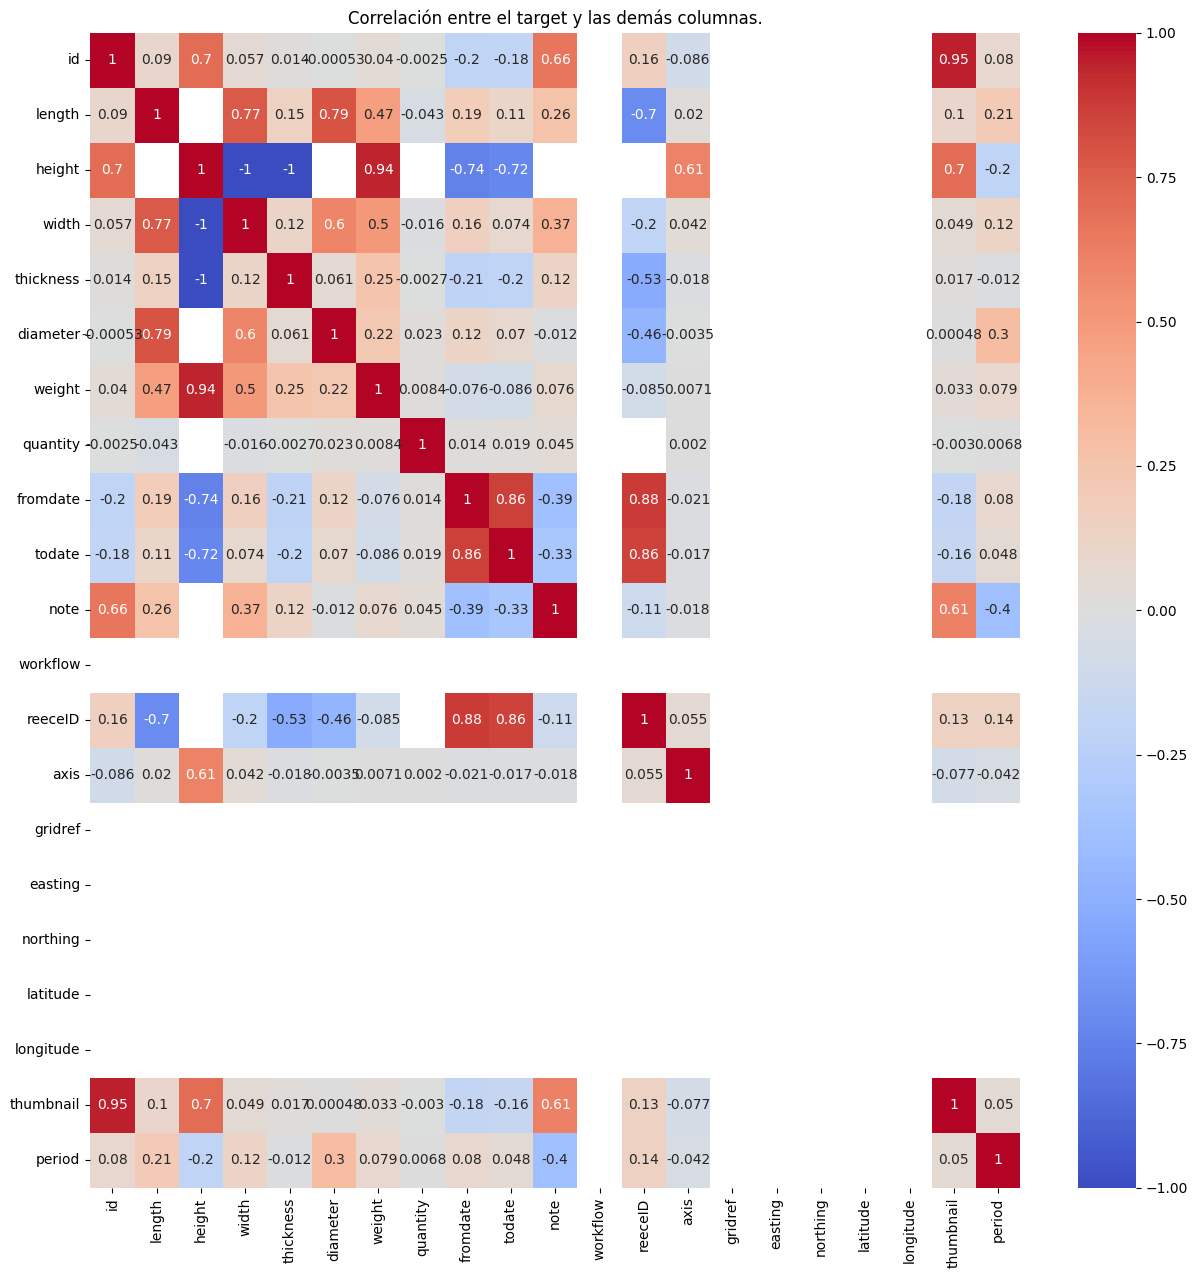

In [31]:
'''Visualización de la correlación de la target con las columnas originales.'''

plt.figure(figsize=(15,15));
sns.heatmap(df_2.corr(numeric_only=True), annot=True, cmap='coolwarm');
plt.title('Correlación entre el target y las demás columnas.');

In [32]:
'''Eliminar las columnas vacías.'''

df_2 = df_2.drop(columns = ['gridref', 'workflow', 'easting', 'northing', 'latitude', 'longitude'], axis = 1)

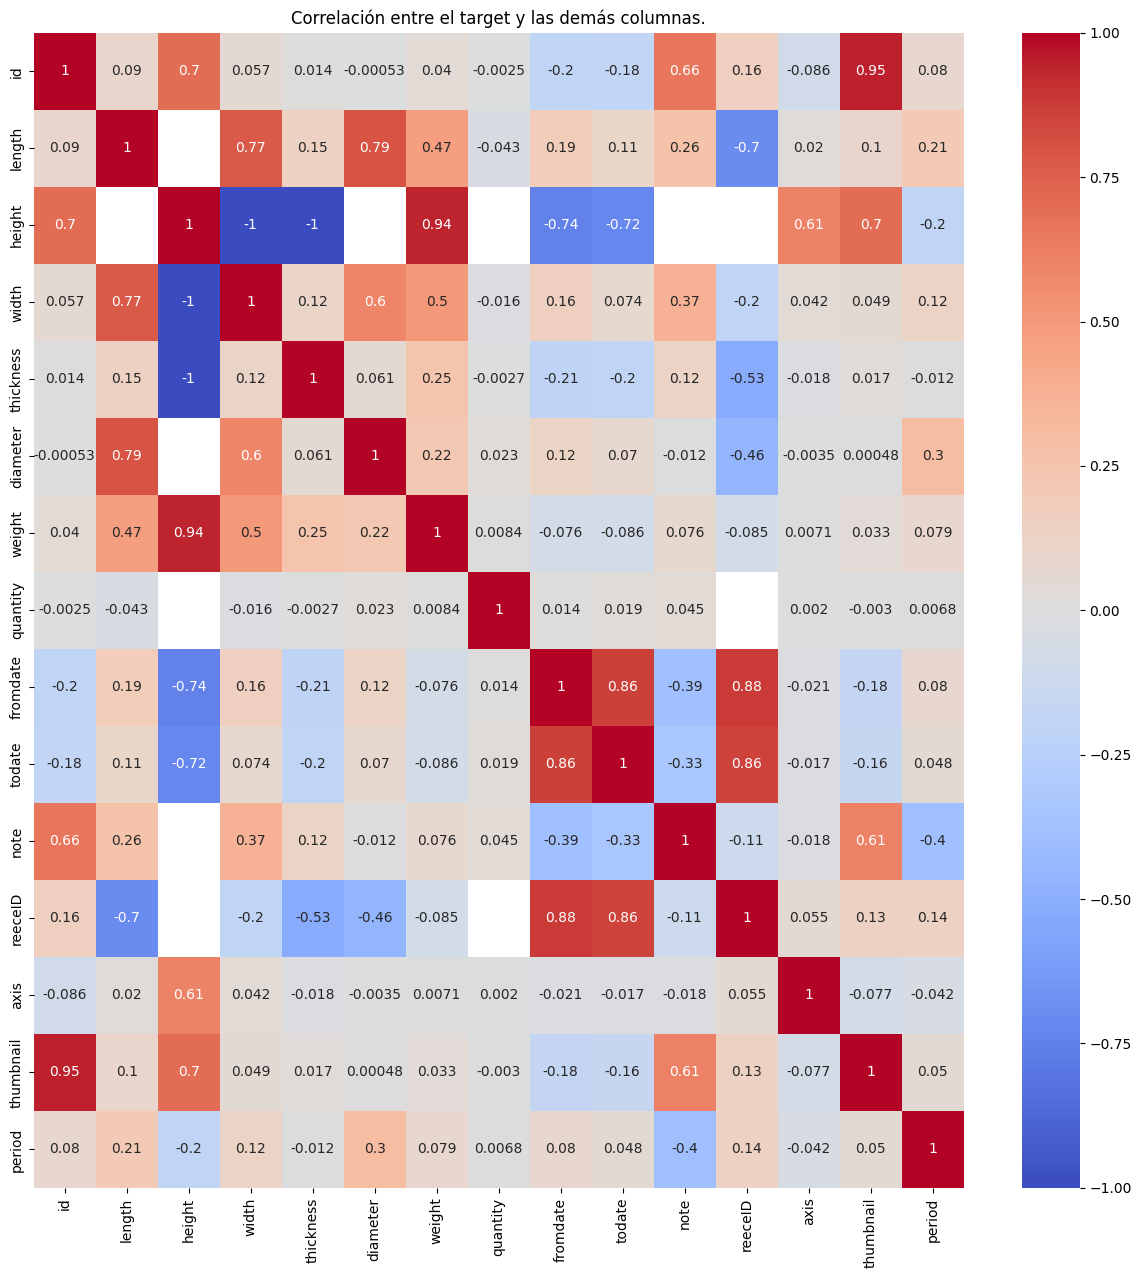

In [33]:
'''Visualización de la correlación de la target con las columnas originales.'''

plt.figure(figsize=(15,15));
sns.heatmap(df_2.corr(numeric_only=True), annot=True, cmap='coolwarm');
plt.title('Correlación entre el target y las demás columnas.');

Al ver la poca correlación con el target, decido obtener dos características más de las monedas del dataset a través del webscrapping.

In [ ]:
'''Guardar el dataframe con la columna del target.'''

df_2.to_csv('../data/processed/df_2.csv', index=False)

'Guardar el dataframe con la columna del target.'

### 3.2. Webscrapping.

In [33]:
'''IMPORTAR BIBLIOTECAS.'''

import os
import requests
from bs4 import BeautifulSoup
import base64
from urllib.parse import urljoin

In [ ]:
# Crear una carpeta para guardar las imágenes si no existe
IMAGE_FOLDER = "Fotos_monedas"
os.makedirs(IMAGE_FOLDER, exist_ok=True)

def scrape_data(url):
    headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)

    # Verificar si la página se descarga correctamente
    if response.status_code != 200:
        print(f"Error al acceder a {url}. Status Code: {response.status_code}")
        return {"URL": url, "Unique ID": None, "Primary material": None, "Manufacture method": None, "Image URL": None, "Saved Image": None}

    soup = BeautifulSoup(response.text, "html.parser")

    # Extraer Unique ID
    unique_id_tag = soup.select_one("span.fourfigure")
    unique_id = unique_id_tag.get_text(strip=True) if unique_id_tag else None

    # Extraer Primary material
    primary_material_tag = soup.select_one("p span[property='pas:primaryMaterial']")
    primary_material = primary_material_tag.text.strip() if primary_material_tag else None

    # Extraer Manufacture method
    manufacture_method_tag = soup.select_one("p span[property='pas:manufactureMethod']")
    manufacture_method = manufacture_method_tag.text.strip() if manufacture_method_tag else None

    # Extraer la URL de la imagen específica dentro del div con id="imagepane"
    image_div = soup.find("div", id="imagepane")
    img_url = None
    if image_div:
        img_tag = image_div.find("img")
        img_url = img_tag["src"] if img_tag else None

        # Si la URL de la imagen es relativa, convertirla en absoluta
        if img_url and img_url.startswith('/'):
            img_url = urljoin(url, img_url)

    img_filename = None
    if img_url and img_url.startswith("data:image"):
        # Procesar imagen en base64
        img_data = img_url.split(",")[1]
        img_bytes = base64.b64decode(img_data)
        img_ext = ".jpg"
        img_filename = os.path.join(IMAGE_FOLDER, f"{unique_id}{img_ext}")
        with open(img_filename, "wb") as img_file:
            img_file.write(img_bytes)
    elif img_url:
        # Descargar imagen desde URL normal
        image_response = requests.get(img_url, headers=headers)
        if image_response.status_code == 200:
            img_ext = ".jpg" if ".jpg" in img_url else ".png"
            img_filename = os.path.join(IMAGE_FOLDER, f"{unique_id}{img_ext}")
            with open(img_filename, "wb") as img_file:
                img_file.write(image_response.content)

    return {
        "URL": url,
        "Unique ID": unique_id,
        "Primary material": primary_material,
        "Manufacture method": manufacture_method,
        "Image URL": img_url,
        "Saved Image": img_filename
    }


'\n# Crear una carpeta para guardar las imágenes si no existe\nIMAGE_FOLDER = "Fotos_monedas"\nos.makedirs(IMAGE_FOLDER, exist_ok=True)\n\ndef scrape_data(url):\n    headers = {"User-Agent": \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36\'}\n    response = requests.get(url, headers=headers)\n\n    # Verificar si la página se descarga correctamente\n    if response.status_code != 200:\n        print(f"Error al acceder a {url}. Status Code: {response.status_code}")\n        return {"URL": url, "Unique ID": None, "Primary material": None, "Manufacture method": None, "Image URL": None, "Saved Image": None}\n\n    soup = BeautifulSoup(response.text, "html.parser")\n\n    # Extraer Unique ID\n    unique_id_tag = soup.select_one("span.fourfigure")\n    unique_id = unique_id_tag.get_text(strip=True) if unique_id_tag else None\n\n    # Extraer Primary material\n    primary_material_tag = soup.select_one("p span[property=\'pas:pr

In [35]:
'''Aplicar la función de webscrapping a todas las URLs del dataset proveniente de Kaggle.'''

results = df_2['uri'].apply(scrape_data)

NameError: name 'scrape_data' is not defined

In [36]:
# Filtrar los resultados que no son None
filtered_results = [result for result in results if result is not None]

# Convertir los resultados filtrados a DataFrame
df_results = pd.DataFrame(filtered_results)

df_results

NameError: name 'results' is not defined

In [ ]:
'''Guardar el dataframe proveniente del webscrapping.'''

df_results = df_results.to_csv('../data/raw/Resultados_Webscrapping.csv', index=False)

'Guardar el dataframe unificado, el proveniente de Kaggle con las dos nuevas columnas\nobtenidas por webscrapping.'